<a href="https://colab.research.google.com/github/AryaHanaafi/ML-Repo3/blob/main/jabodetabek_house_price_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
deep learning fundamental ,  ALGORITMA LINEAR REGRESSION

Here is all the data you need:
"jabodetabek_house_price.csv"

## Data loading

### Subtask:
Load the data from "jabodetabek_house_price.csv" into a dataframe.


**Reasoning**:
Import pandas and load the CSV file into a DataFrame, then display the first 5 rows to verify the data loading.



In [1]:
import pandas as pd

df = pd.read_csv('jabodetabek_house_price.csv')
display(df.head())

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


## Data cleaning

### Subtask:
Handle any missing values or outliers in the dataset.


**Reasoning**:
Check for missing values in each column of the DataFrame.



In [2]:
display(df.isnull().sum())

,0
url,0
price_in_rp,0
title,0
address,0
district,0
city,0
lat,0
long,0
facilities,0
property_type,1


**Reasoning**:
Handle missing values based on the observed counts. Drop columns with a large number of missing values, specifically 'building_age', 'year_built', and 'building_orientation'. For columns with a smaller number of missing values, impute numerical columns with the median and categorical columns with the mode.



In [3]:
df = df.drop(columns=['building_age', 'year_built', 'building_orientation'])

numerical_cols = ['bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'floors']
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

categorical_cols = ['property_type', 'certificate', 'property_condition', 'furnishing']
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

display(df.isnull().sum())

,0
url,0
price_in_rp,0
title,0
address,0
district,0
city,0
lat,0
long,0
facilities,0
property_type,0


**Reasoning**:
Check for outliers in numerical columns using descriptive statistics and visualize them with box plots if necessary.



,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,garages
count,3.553000e+03,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.323389,2.619758,204.752322,186.545455,1.197861,0.496482,0.370391,1.764987,0.708978
std,1.375067e+10,0.129245,0.172159,2.659518,2.686055,402.021078,248.379819,1.114996,0.685723,0.536024,0.636884,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,66.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,50.000000


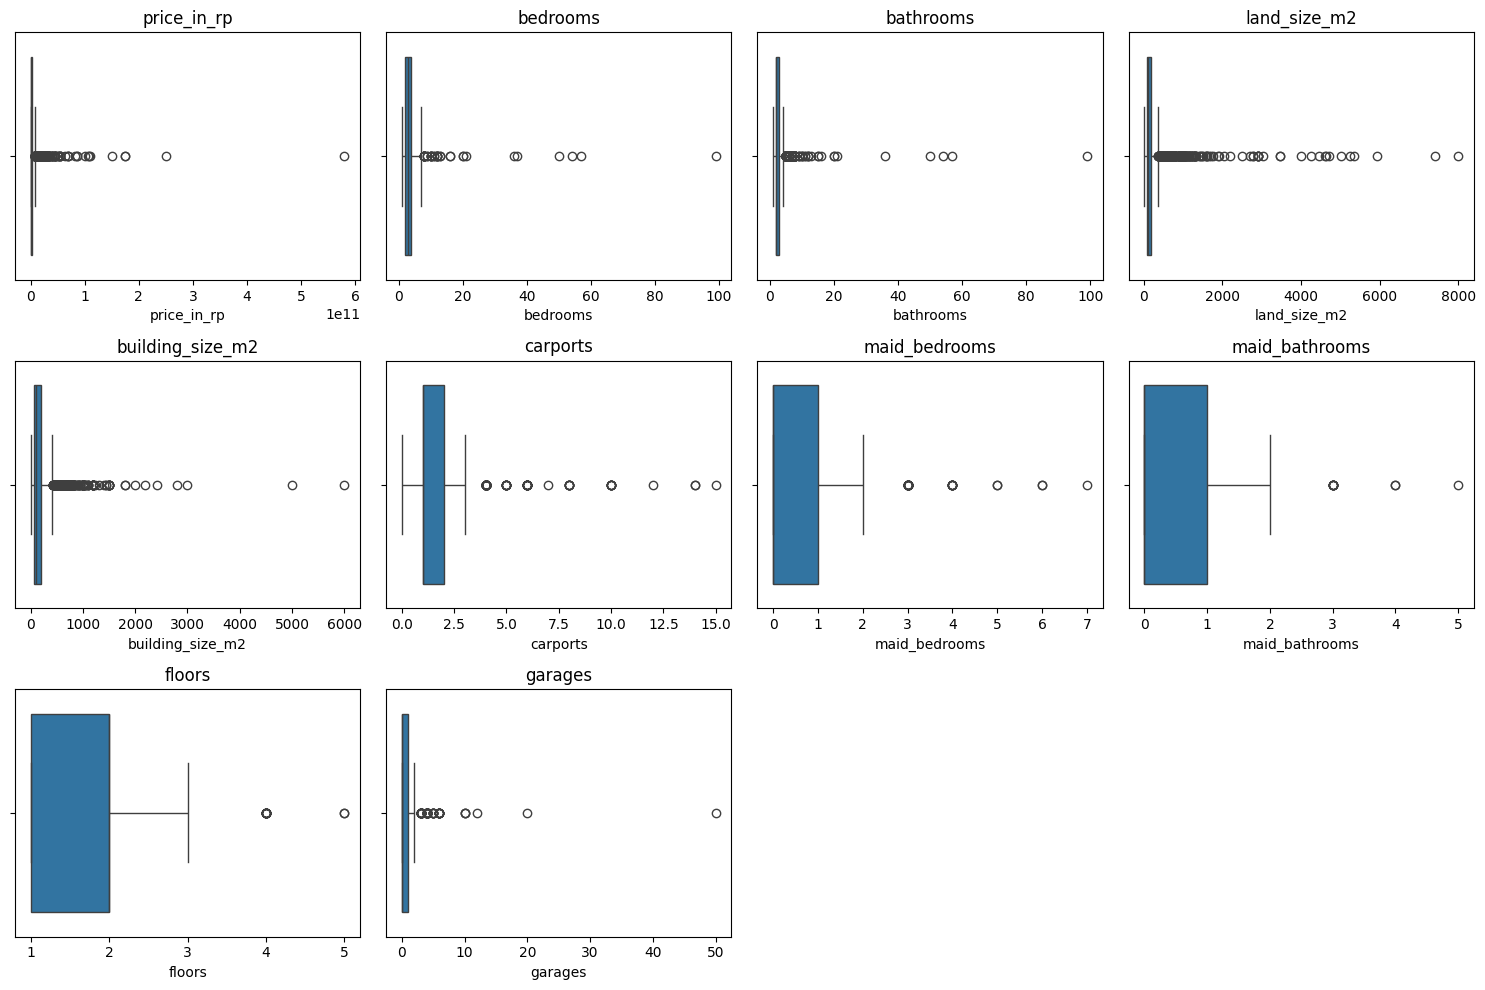

In [4]:
display(df.describe())
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_for_outliers = ['price_in_rp', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'carports', 'maid_bedrooms', 'maid_bathrooms', 'floors', 'garages']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Reasoning**:
Handle outliers by removing rows where the value in 'price_in_rp', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'carports', 'garages' are extremely high based on the box plots and descriptive statistics. These extreme values are likely data entry errors or represent a very small portion of the data that could skew the model.



In [5]:
df = df[df['price_in_rp'] < 1e11]
df = df[df['bedrooms'] < 20]
df = df[df['bathrooms'] < 20]
df = df[df['land_size_m2'] < 4000]
df = df[df['building_size_m2'] < 3000]
df = df[df['carports'] < 10]
df = df[df['garages'] < 10]

display(df.describe())

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,garages
count,3.516000e+03,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000
mean,3.543275e+09,-6.324170,106.792551,3.199943,2.499716,180.791524,175.383106,1.160125,0.487770,0.365188,1.760808,0.675484
std,6.239589e+09,0.128182,0.172808,1.171550,1.298757,245.884714,187.692787,0.934079,0.667573,0.527777,0.628810,0.900881
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,74.000000,65.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,106.000000,110.000000,1.000000,0.000000,0.000000,2.000000,0.000000
75%,3.500000e+09,-6.231754,106.874766,4.000000,3.000000,180.000000,200.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,8.500000e+10,-6.102478,109.771691,16.000000,16.000000,3475.000000,2800.000000,8.000000,7.000000,5.000000,4.000000,6.000000


## Data exploration

### Subtask:
Explore the dataset to understand the distribution of house prices and the relationship between different features and the price.


**Reasoning**:
Display the distribution of the target variable 'price_in_rp' using a histogram.



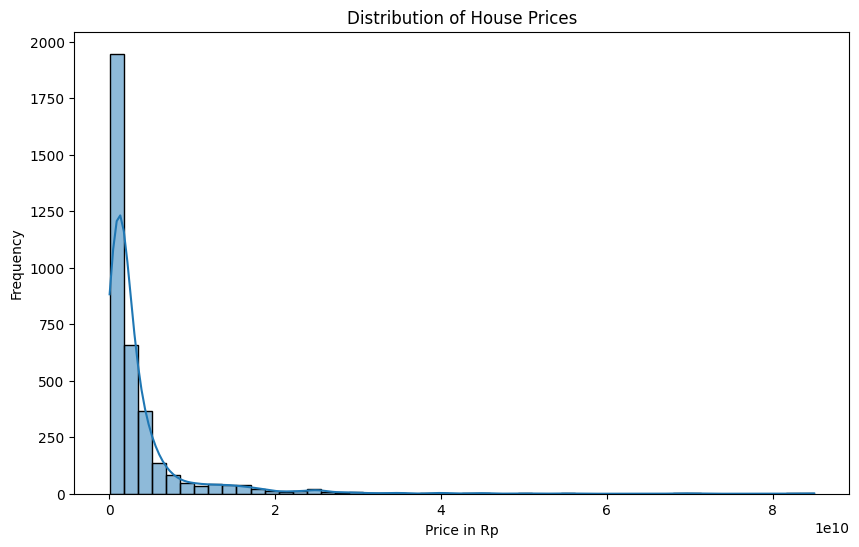

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price_in_rp'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price in Rp')
plt.ylabel('Frequency')
plt.show()

**Reasoning**:
Calculate and display the correlation matrix between the numerical features and 'price_in_rp'.



In [7]:
numerical_features = ['price_in_rp', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'carports', 'maid_bedrooms', 'maid_bathrooms', 'floors', 'garages']
correlation_matrix = df[numerical_features].corr()
display(correlation_matrix)

,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,garages
price_in_rp,1.000000,0.480427,0.535372,0.642976,0.806056,0.361890,0.511093,0.483879,0.280611,0.424917
bedrooms,0.480427,1.000000,0.789170,0.456796,0.616560,0.310522,0.436911,0.434931,0.460004,0.287651
bathrooms,0.535372,0.789170,1.000000,0.508760,0.654363,0.354032,0.525006,0.505262,0.554678,0.325381
land_size_m2,0.642976,0.456796,0.508760,1.000000,0.680816,0.418951,0.490037,0.418515,0.133765,0.362782
building_size_m2,0.806056,0.616560,0.654363,0.680816,1.000000,0.383590,0.571142,0.555599,0.410478,0.405499
carports,0.361890,0.310522,0.354032,0.418951,0.383590,1.000000,0.351023,0.344751,0.210536,0.251095
maid_bedrooms,0.511093,0.436911,0.525006,0.490037,0.571142,0.351023,1.000000,0.742630,0.330877,0.325718
maid_bathrooms,0.483879,0.434931,0.505262,0.418515,0.555599,0.344751,0.742630,1.000000,0.373006,0.307361
floors,0.280611,0.460004,0.554678,0.133765,0.410478,0.210536,0.330877,0.373006,1.000000,0.182846
garages,0.424917,0.287651,0.325381,0.362782,0.405499,0.251095,0.325718,0.307361,0.182846,1.000000


**Reasoning**:
Create scatter plots to visualize the relationship between some key numerical features and 'price_in_rp'.



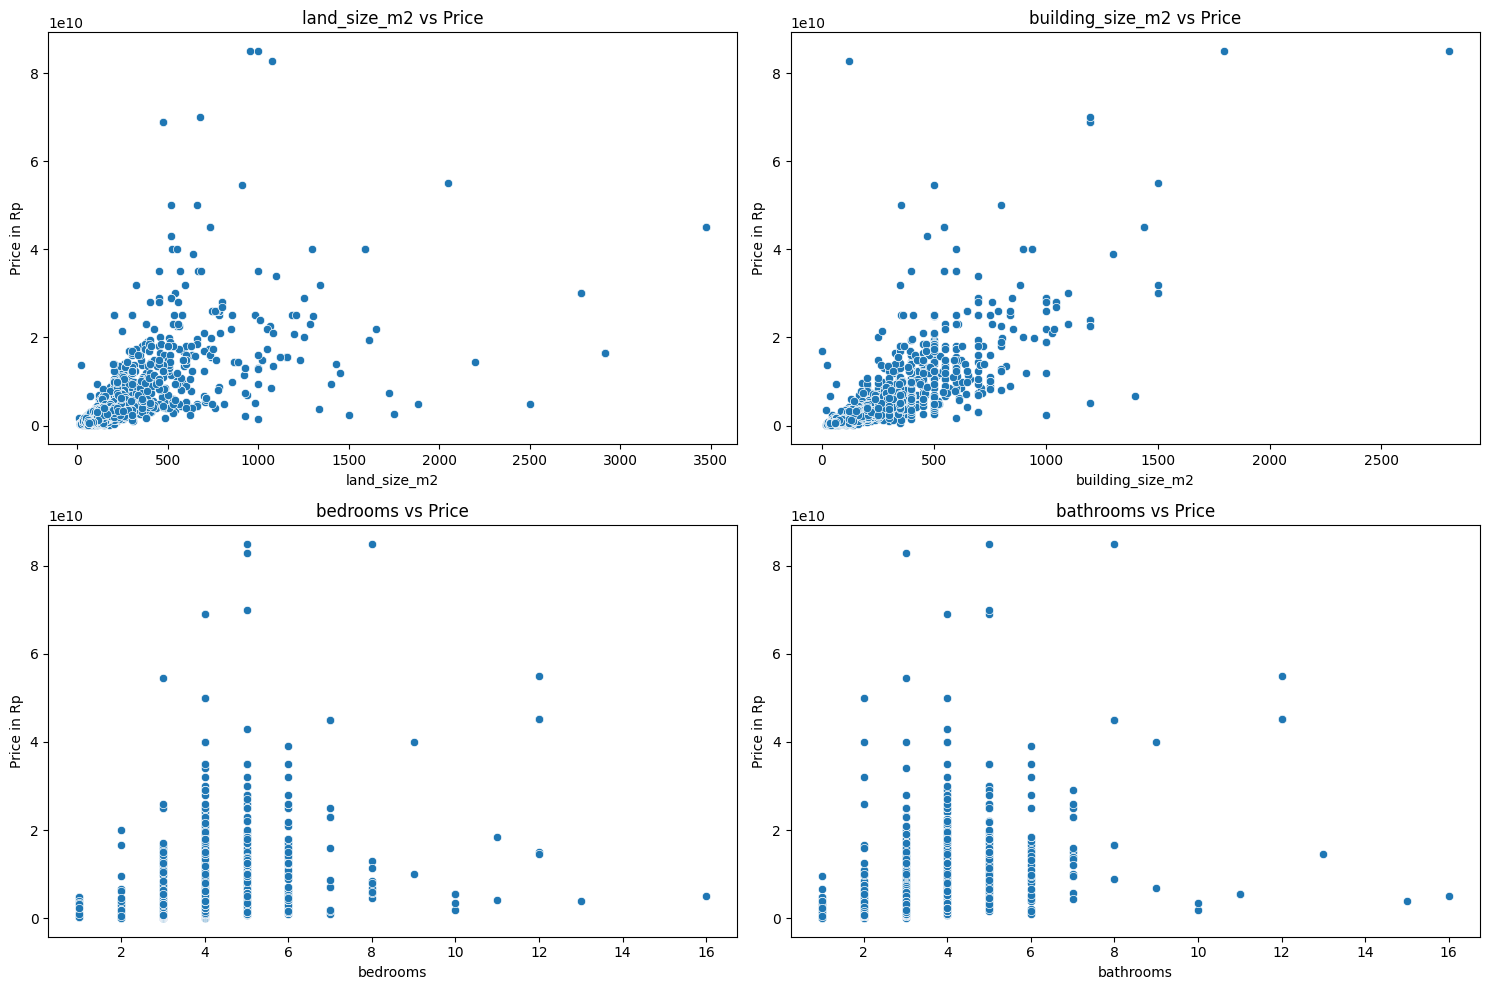

In [8]:
numerical_features_for_scatter = ['land_size_m2', 'building_size_m2', 'bedrooms', 'bathrooms']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_for_scatter):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['price_in_rp'])
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price in Rp')
plt.tight_layout()
plt.show()

**Reasoning**:
Analyze the relationship between categorical features and 'price_in_rp' using box plots.



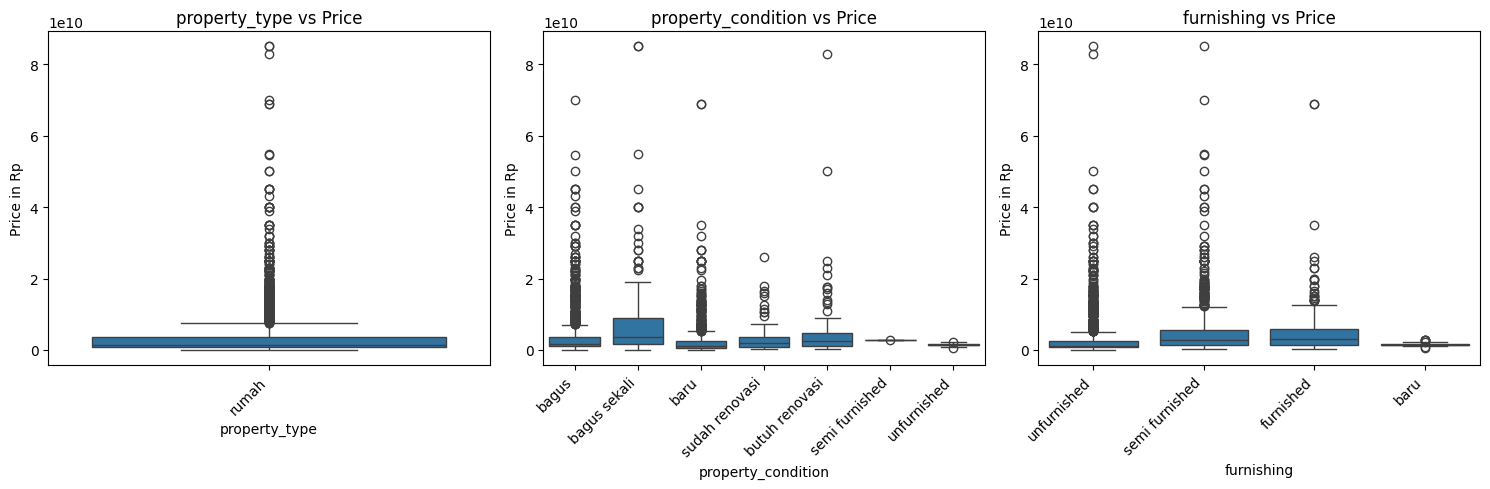

In [9]:
categorical_features_for_box = ['property_type', 'property_condition', 'furnishing']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features_for_box):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], y=df['price_in_rp'])
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price in Rp')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Select relevant features and potentially create new ones that could improve the linear regression model's performance.


**Reasoning**:
Select the relevant numerical and categorical features based on the previous exploration and apply one-hot encoding to the categorical features. Create a new DataFrame with the selected and engineered features, including the target variable.



In [10]:
# Select numerical features with significant correlation based on previous exploration
numerical_features_selected = ['bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'floors', 'carports', 'garages']

# Select relevant categorical features based on previous exploration
categorical_features_selected = ['property_type', 'property_condition', 'furnishing']

# Create a new DataFrame with selected features and target variable
features_df = df[numerical_features_selected + categorical_features_selected + ['price_in_rp']].copy()

# Apply one-hot encoding to selected categorical features
features_df = pd.get_dummies(features_df, columns=categorical_features_selected, drop_first=True)

display(features_df.head())

,bedrooms,bathrooms,land_size_m2,building_size_m2,floors,carports,garages,price_in_rp,property_condition_bagus sekali,property_condition_baru,property_condition_butuh renovasi,property_condition_semi furnished,property_condition_sudah renovasi,property_condition_unfurnished,furnishing_furnished,furnishing_semi furnished,furnishing_unfurnished
0,4.0,4.0,239.0,272.0,2.0,0.0,0.0,2.990000e+09,False,False,False,False,False,False,False,False,True
1,3.0,2.0,55.0,69.0,2.0,1.0,0.0,1.270000e+09,False,False,False,False,False,False,False,False,True
2,3.0,3.0,119.0,131.0,2.0,1.0,1.0,1.950000e+09,False,False,False,False,False,False,False,False,True
3,3.0,3.0,180.0,174.0,2.0,0.0,2.0,3.300000e+09,True,False,False,False,False,False,False,False,True
4,4.0,3.0,328.0,196.0,2.0,2.0,1.0,4.500000e+09,False,False,False,False,False,False,False,False,True


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets according to the instructions.



In [11]:
from sklearn.model_selection import train_test_split

X = features_df.drop('price_in_rp', axis=1)
y = features_df['price_in_rp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (2812, 16)
Shape of X_test: (704, 16)
Shape of y_train: (2812,)
Shape of y_test: (704,)


## Model training

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Train a linear regression model on the training data.



In [12]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the performance of the trained linear regression model on the testing data using appropriate metrics (e.g., R-squared, Mean Squared Error).


**Reasoning**:
Import the necessary metrics for model evaluation and make predictions on the test set.



In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)

**Reasoning**:
Calculate and print the Mean Squared Error and R-squared score to evaluate the model's performance.



In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.71250673492614e+19
R-squared (R2): 0.3944149427587559
